### Compare Experiment 2 and 3 and see why 5-coupled fit better at Exp-3 compared with other models

In [21]:
# magic lines that avoid re-start 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import pybamm as pb;import pandas as pd   ;import numpy as np;
import os; import seaborn as sns
import matplotlib.pyplot as plt;import os;import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;
import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl; import json
import traceback
import multiprocessing
import scipy.optimize
import timeit
import random;import time, signal
fs=17;

font = {'family' : 'Arial',  'size'   : fs}
mpl.rc('font', **font)

In [23]:
# define global index and dict for all experiment data - prepare for read!
Exp_Path = [
    "Expt 1 - Si-based Degradation",
    "Expt 2,2 - C-based Degradation 2",
    "Expt 3 - Cathode Degradation and Li-Plating",
    "Expt 4 - Drive Cycle Aging (Control)",
    "Expt 5 - Standard Cycle Aging (Control)",]
Exp_head = [
    "Expt 1",
    "Expt 2,2",
    "Expt 3",
    "Expt 4",
    "Expt 5",]
Exp_1_Cell = ["A","B","J","D","E","F","K","L","M"];
Exp_1_Temp = {
    "A":"10","B":"10","J":"10",
    "D":"25","E":"25","F":"25",
    "K":"40","L":"40","M":"40",}
Temp_Cell_Exp_1 = {
    "10":["A","B","J"],
    "25":["D","E","F"],
    "40":["K","L","M"],}
Exp_2_Cell = ["A","B","C","D","E","F"];
Exp_2_Temp = {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",}
Temp_Cell_Exp_2 = {
    "10":["A","B"],
    "25":["C","D"],
    "40":["E","F"],}
Exp_3_Cell = ["A","B","C","D","E","F","G","H","I"];
Exp_3_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25","F":"25",
    "G":"40","H":"40","I":"40"}
Temp_Cell_Exp_3 = {
    "10":["A","B","C"],
    "25":["D","E","F"],
    "40":["G","H","I"],}
Exp_4_Cell = ["A","B","C","D","E","F","G","H"];
Exp_4_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_4 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_5_Cell = ["A","B","C","D","E","F","G","H"];
Exp_5_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_5 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_All_Cell  = [Exp_1_Cell,Exp_2_Cell,Exp_3_Cell,Exp_4_Cell,Exp_5_Cell]
Exp_Temp_Cell = [Exp_1_Temp,Exp_2_Temp,Exp_3_Temp,Exp_4_Temp,Exp_5_Temp]
Temp_Cell_Exp_All = [Temp_Cell_Exp_1,Temp_Cell_Exp_2,Temp_Cell_Exp_3,Temp_Cell_Exp_4,Temp_Cell_Exp_5]
Mark_Cell_All = [
    {
    "A":"o","B":">","J":"v",
    "D":"o","E":">","F":"v",
    "K":"o","L":">","M":"v",},
    {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">","F":"v",
    "G":"o","H":">","I":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",}]
Color_Cell_All = [
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"J":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "K":[1,0,0,0.4],"L":[1,0,0,0.4],"M":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"C":[0, 0, 0,0.7],
    "E":[1,0,0,0.4],"F":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "G":[1,0,0,0.4],"H":[1,0,0,0.4],"I":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],}]


In [24]:
# ready experiment data
import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"Reproduce_Li2024"))
sys.path.append(str_path_1) 
from Fun_NC import * # directly do this for HPC Reproduce_Li2024
# Load Niall's data
str_path_2 = os.path.abspath(os.path.join(pb.__path__[0],'..\\..'))
Path_NiallDMA = os.path.abspath(os.path.join(str_path_2,"SimSave\\InputData\\"))

Exp_no = 3
Temp_Cell_Exp3 = Temp_Cell_Exp_All[Exp_no-1] 
Exp_3_AllData = Read_Exp(
    Path_NiallDMA,Exp_All_Cell[Exp_no-1],
    Exp_Path,Exp_head,Exp_Temp_Cell[Exp_no-1],
    Exp_no-1)

Exp_no = 2
Temp_Cell_Exp2 = Temp_Cell_Exp_All[Exp_no-1] 
Exp_2_AllData = Read_Exp(
    Path_NiallDMA,Exp_All_Cell[Exp_no-1],
    Exp_Path,Exp_head,Exp_Temp_Cell[Exp_no-1],
    Exp_no-1)

Finish reading Experiment!
Finish reading Experiment!


In [25]:
import pickle
def Read_Model_BestFit(Path_to_Results, purpose_i, Pick, Re_No):
    purpose = f"{purpose_i}_Case_{Pick}_{Pick}"
    path_i = os.path.join(
        Path_to_Results,  purpose, "Mats", 
        f"{Pick}_Re_{Re_No}-midc_merge.pkl")
    #print(path_i)
    with open(path_i, 'rb') as file:
        data = pickle.load(file)
    return data

BasicPath = os.path.join(
    os.path.abspath(os.path.join(pb.__path__[0],'..\\..')), 
    'SimSave', 'Li2024_Results', 'Save_LongRun')
purpose_i = "SEI_Exp1235_NC"
Path_to_Results = os.path.join(BasicPath, purpose_i, "Results")

SEI_Exp3_GoodFit = {}
SEI_Exp3_GoodFit["10"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=7, Re_No=0)
SEI_Exp3_GoodFit["25"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=8, Re_No=0)
SEI_Exp3_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=9, Re_No=0)

SEI_Exp2_GoodFit = {}
SEI_Exp2_GoodFit["10"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=4, Re_No=0)
SEI_Exp2_GoodFit["25"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=5, Re_No=0)
SEI_Exp2_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=6, Re_No=0)

In [26]:

purpose_i = "SEI_Dry_Exp1235_NC"
Path_to_Results = os.path.join(BasicPath, purpose_i, "Results")

SEIDry_Exp3_GoodFit = {}
SEIDry_Exp3_GoodFit["10"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=7, Re_No=0)
SEIDry_Exp3_GoodFit["25"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=8, Re_No=0)
SEIDry_Exp3_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=9, Re_No=0)

SEIDry_Exp2_GoodFit = {}
SEIDry_Exp2_GoodFit["10"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=4, Re_No=0)
SEIDry_Exp2_GoodFit["25"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=5, Re_No=0)
SEIDry_Exp2_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=6, Re_No=0)

In [27]:
 
purpose_i = "Full_Exp1235_NC"
Path_to_Results = os.path.join(BasicPath, purpose_i, "Results")

Full_Exp3_GoodFit = {}
Full_Exp3_GoodFit["10"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=7, Re_No=0)
Full_Exp3_GoodFit["25"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=8, Re_No=0)
Full_Exp3_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=9, Re_No=0)

Full_Exp2_GoodFit = {}
Full_Exp2_GoodFit["10"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=4, Re_No=0)
Full_Exp2_GoodFit["25"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=5, Re_No=0)
Full_Exp2_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=6, Re_No=0)

In [28]:
SaveFig_Path = os.path.join(
    os.path.abspath(os.path.join(pb.__path__[0],'..\\..')), 
    'SimSave', 'Li2024_Results', 'SaveFig')
Target = "R_241208_Compare_Exp_2_3"
target_folder = os.path.join(SaveFig_Path, Target)
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

In [29]:
colors = [
    (106, 61, 154, 1),        # 紫色
    (230, 159, 0, 1),        # 橙色
    (86, 180, 233, 1),       # 天蓝色
    (213, 94, 0, 1),         # 红色
]
cm_4s = [(r/255, g/255, b/255, d) for r, g, b, d in colors]
ps_num = 40; index_exp=3;  T_deg = 25; dpi = 300

Cases_3 = [SEI_Exp3_GoodFit,SEIDry_Exp3_GoodFit,Full_Exp3_GoodFit]
Cases_2 = [SEI_Exp2_GoodFit,SEIDry_Exp2_GoodFit,Full_Exp2_GoodFit]
Str_cases = ["SEI only","SEI + Dry out","5 coupled",]

In [30]:
print(len(Full_Exp3_GoodFit[str(T_deg)][0]["CD Time [h]"]))
print(T_deg)

13
25


In [31]:
sum(SEIDry_Exp3_GoodFit[str(T_deg)][1]["CDend Porosity"][-1][0:10])

1.9579459670285517

In [33]:
# Get DVA 
def Get_DVA(data):
    M = len(data["CD Terminal voltage [V]"])
    data["CD Cap [A.h]"] = [];  data["CD SOC"] = [];
    data["CD dV_dQ_cell [V/Ah]"] = [];  data["CD dV_dQ_an [V/Ah]"] = [];
    data["CD dV_dQ_ca [V/Ah]"] = [];
    for m in range(M):
        V_cell = np.array(data["CD Terminal voltage [V]"][m])
        V_an   = np.array(data["CD Anode potential [V]"][m])
        V_ca   = np.array(data["CD Cathode potential [V]"][m])
        cap_dis= np.array(data["CD Time [h]"][m][-1]) * 0.5  - np.array(data["CD Time [h]"][m]) * 0.5 
        soc_dis= cap_dis / cap_dis[0] * 100
        dV_dQ_cell = np.diff(V_cell) / np.diff(cap_dis)
        dV_dQ_an = np.diff(V_an) / np.diff(cap_dis)
        dV_dQ_ca = np.diff(V_ca) / np.diff(cap_dis)
        data["CD Cap [A.h]"].append(cap_dis)
        data["CD SOC"].append(soc_dis)
        data["CD dV_dQ_cell [V/Ah]"].append(dV_dQ_cell)
        data["CD dV_dQ_an [V/Ah]"].append(dV_dQ_an)
        data["CD dV_dQ_ca [V/Ah]"].append(dV_dQ_ca)
    return data

T_deg_All = ["10","25","40"] 
for i,case_i in enumerate(Cases_2):
    for T_deg in T_deg_All:
        case_i[T_deg][0]  =  Get_DVA(case_i[T_deg][0])

for i,case_i in enumerate(Cases_3):
    for T_deg in T_deg_All:
        case_i[T_deg][0]  =  Get_DVA(case_i[T_deg][0])

C:\Users\lrhkm\AppData\Local\Temp\ipykernel_17324\854740458.py:58: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


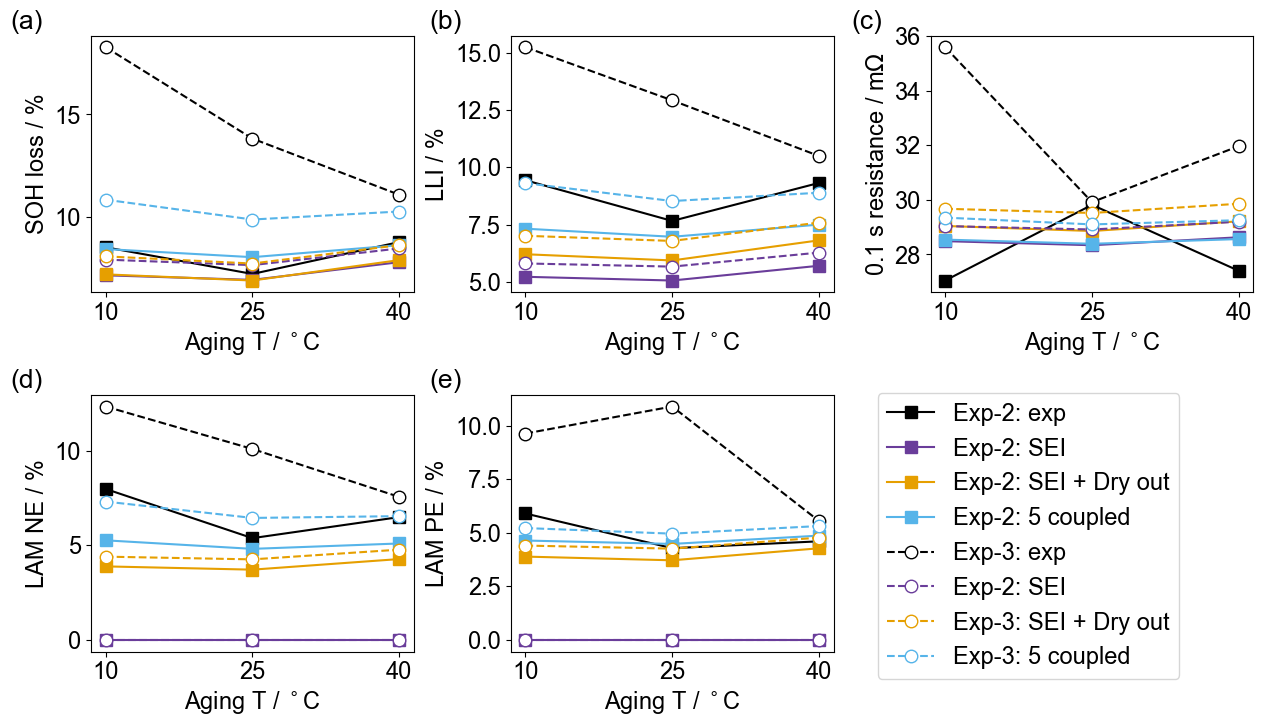

In [34]:
# Supplementary Figure 6
path_i = SaveFig_Path
with open(path_i + '/T_dependency_Exp2.pkl', 'rb') as file:
    Exp2 = pickle.load(file)
with open(path_i + '/T_dependency_Exp3.pkl', 'rb') as file:
    Exp3 = pickle.load(file)
[
    Exp2_exp_at_x_0, Exp2_SEI_at_x_0,
    Exp2_SEIDry_at_x_0, Exp2_5couple_at_x_0] = Exp2
[
    Exp3_exp_at_x_0, Exp3_SEI_at_x_0,
    Exp3_SEIDry_at_x_0, Exp3_5couple_at_x_0] = Exp3
fig, Axs = plt.subplots(2,3, figsize=(15,8),tight_layout=True) 
axs = Axs.flatten()
keys = ["SOH_loss", "LLI", "Res",  "LAM_Ne", "LAM_Pe"]
ms = 9
for i in range(5):
    axs[i].plot(
        Exp2_exp_at_x_0["Age_T"],Exp2_exp_at_x_0[keys[i]],color = "k",
        marker = 's',markersize = ms,linestyle='-', label='Exp-2: exp') 
    axs[i].plot(
        Exp2_exp_at_x_0["Age_T"],Exp2_SEI_at_x_0[keys[i]],color = cm_4s[0],
        marker = 's',markersize = ms,linestyle='-', label='Exp-2: SEI') 
    axs[i].plot(
        Exp2_exp_at_x_0["Age_T"],Exp2_SEIDry_at_x_0[keys[i]],color = cm_4s[1],
        marker = 's',markersize = ms,linestyle='-', label='Exp-2: SEI + Dry out') 
    axs[i].plot(
        Exp2_exp_at_x_0["Age_T"],Exp2_5couple_at_x_0[keys[i]],color = cm_4s[2],
        marker = 's',markersize = ms,linestyle='-', label='Exp-2: 5 coupled') 
    
    axs[i].plot(
        Exp3_exp_at_x_0["Age_T"],Exp3_exp_at_x_0[keys[i]],color = "k",
        marker = 'o',markersize = ms,markerfacecolor='w',linestyle='--',label='Exp-3: exp') 
    axs[i].plot(
        Exp3_exp_at_x_0["Age_T"],Exp3_SEI_at_x_0[keys[i]],color = cm_4s[0],
        marker = 'o',markersize = ms,markerfacecolor='w',linestyle='--', label='Exp-2: SEI') 
    axs[i].plot(
        Exp3_exp_at_x_0["Age_T"],Exp3_SEIDry_at_x_0[keys[i]],color = cm_4s[1],
        marker = 'o',markersize = ms,markerfacecolor='w',linestyle='--', 
        label='Exp-3: SEI + Dry out') 
    axs[i].plot(
        Exp3_exp_at_x_0["Age_T"],Exp3_5couple_at_x_0[keys[i]],color = cm_4s[2],
        marker = 'o',markersize = ms,markerfacecolor='w',linestyle='--', 
        label='Exp-3: 5 coupled') 
Y_labels = ["SOH loss / %", "LLI / %", r"0.1 s resistance / m$\Omega$", "LAM NE / %", "LAM PE / %" ]
ABC_labels = [f"({chr(97 + i)})" for i in range(5)] 
fig.delaxes(axs[5])
for i in range(5):
    axs[i].set_xticks([10, 25, 40])
    axs[i].set_xlabel(r"Aging T / $^\circ$C")
    axs[i].set_ylabel(Y_labels[i])
    axs[i].text(
        -0.15, 1.10, 
        ABC_labels[i], transform=axs[i].transAxes, 
        fontsize=fs+2,  # fontweight='bold', 
        va='top', ha='right')
axs[0].legend(loc='center left', bbox_to_anchor=(2.4, -0.95), fontsize=fs)
plt.tight_layout()
# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)


plt.savefig(
    target_folder + 
    f"/Supplementary Figure 6 Direct_DM_different_mechanisms_Experiment_Model_Exp_2_and_3.svg")
plt.savefig(
    target_folder + 
    f"/Supplementary Figure 6 Direct_DM_different_mechanisms_Experiment_Model_Exp_2_and_3.png", dpi=dpi)


In [43]:
# save data for Supplementary Figure 6
excel_file_path = os.path.join(target_folder, "Supplementary Figure 6.xlsx")
data_for_excel = {}

# 保存fig(a)数据
df_fig_a = pd.DataFrame({
    'Age_T_Exp2_exp': Exp2_exp_at_x_0["Age_T"],
    'SOH_loss_Exp2_exp': Exp2_exp_at_x_0["SOH_loss"],
    'SOH_loss_Exp2_SEI': Exp2_SEI_at_x_0["SOH_loss"],
    'SOH_loss_Exp2_SEIDry': Exp2_SEIDry_at_x_0["SOH_loss"],
    'SOH_loss_Exp2_5couple': Exp2_5couple_at_x_0["SOH_loss"],
    'Age_T_Exp3_exp': Exp3_exp_at_x_0["Age_T"],
    'SOH_loss_Exp3_exp': Exp3_exp_at_x_0["SOH_loss"],
    'SOH_loss_Exp3_SEI': Exp3_SEI_at_x_0["SOH_loss"],
    'SOH_loss_Exp3_SEIDry': Exp3_SEIDry_at_x_0["SOH_loss"],
    'SOH_loss_Exp3_5couple': Exp3_5couple_at_x_0["SOH_loss"]
})
data_for_excel['fig(a)'] = df_fig_a

# 保存fig(b)数据
df_fig_b = pd.DataFrame({
    'Age_T_Exp2_exp': Exp2_exp_at_x_0["Age_T"],
    'LLI_Exp2_exp': Exp2_exp_at_x_0["LLI"],
    'LLI_Exp2_SEI': Exp2_SEI_at_x_0["LLI"],
    'LLI_Exp2_SEIDry': Exp2_SEIDry_at_x_0["LLI"],
    'LLI_Exp2_5couple': Exp2_5couple_at_x_0["LLI"],
    'Age_T_Exp3_exp': Exp3_exp_at_x_0["Age_T"],
    'LLI_Exp3_exp': Exp3_exp_at_x_0["LLI"],
    'LLI_Exp3_SEI': Exp3_SEI_at_x_0["LLI"],
    'LLI_Exp3_SEIDry': Exp3_SEIDry_at_x_0["LLI"],
    'LLI_Exp3_5couple': Exp3_5couple_at_x_0["LLI"]
})
data_for_excel['fig(b)'] = df_fig_b

# 保存fig(c)数据
df_fig_c = pd.DataFrame({
    'Age_T_Exp2_exp': Exp2_exp_at_x_0["Age_T"],
    'Res_Exp2_exp': Exp2_exp_at_x_0["Res"],
    'Res_Exp2_SEI': Exp2_SEI_at_x_0["Res"],
    'Res_Exp2_SEIDry': Exp2_SEIDry_at_x_0["Res"],
    'Res_Exp2_5couple': Exp2_5couple_at_x_0["Res"],
    'Age_T_Exp3_exp': Exp3_exp_at_x_0["Age_T"],
    'Res_Exp3_exp': Exp3_exp_at_x_0["Res"],
    'Res_Exp3_SEI': Exp3_SEI_at_x_0["Res"],
    'Res_Exp3_SEIDry': Exp3_SEIDry_at_x_0["Res"],
    'Res_Exp3_5couple': Exp3_5couple_at_x_0["Res"]
})
data_for_excel['fig(c)'] = df_fig_c

# 保存fig(d)数据
df_fig_d = pd.DataFrame({
    'Age_T_Exp2_exp': Exp2_exp_at_x_0["Age_T"],
    'LAM_Ne_Exp2_exp': Exp2_exp_at_x_0["LAM_Ne"],
    'LAM_Ne_Exp2_SEI': Exp2_SEI_at_x_0["LAM_Ne"],
    'LAM_Ne_Exp2_SEIDry': Exp2_SEIDry_at_x_0["LAM_Ne"],
    'LAM_Ne_Exp2_5couple': Exp2_5couple_at_x_0["LAM_Ne"],
    'Age_T_Exp3_exp': Exp3_exp_at_x_0["Age_T"],
    'LAM_Ne_Exp3_exp': Exp3_exp_at_x_0["LAM_Ne"],
    'LAM_Ne_Exp3_SEI': Exp3_SEI_at_x_0["LAM_Ne"],
    'LAM_Ne_Exp3_SEIDry': Exp3_SEIDry_at_x_0["LAM_Ne"],
    'LAM_Ne_Exp3_5couple': Exp3_5couple_at_x_0["LAM_Ne"]
})
data_for_excel['fig(d)'] = df_fig_d

# 保存fig(e)数据
df_fig_e = pd.DataFrame({
    'Age_T_Exp2_exp': Exp2_exp_at_x_0["Age_T"],
    'LAM_Pe_Exp2_exp': Exp2_exp_at_x_0["LAM_Pe"],
    'LAM_Pe_Exp2_SEI': Exp2_SEI_at_x_0["LAM_Pe"],
    'LAM_Pe_Exp2_SEIDry': Exp2_SEIDry_at_x_0["LAM_Pe"],
    'LAM_Pe_Exp2_5couple': Exp2_5couple_at_x_0["LAM_Pe"],
    'Age_T_Exp3_exp': Exp3_exp_at_x_0["Age_T"],
    'LAM_Pe_Exp3_exp': Exp3_exp_at_x_0["LAM_Pe"],
    'LAM_Pe_Exp3_SEI': Exp3_SEI_at_x_0["LAM_Pe"],
    'LAM_Pe_Exp3_SEIDry': Exp3_SEIDry_at_x_0["LAM_Pe"],
    'LAM_Pe_Exp3_5couple': Exp3_5couple_at_x_0["LAM_Pe"]
})
data_for_excel['fig(e)'] = df_fig_e

# 保存到Excel文件
with pd.ExcelWriter(excel_file_path) as writer:
    for sheet_name, data in data_for_excel.items():
        df = pd.DataFrame(data)
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Supplementary Figure 6 saved to {excel_file_path}")

Supplementary Figure 6 saved to d:\lrhwork\model_rh\env_pbgem_nc\SimSave\Li2024_Results\SaveFig\R_241208_Compare_Exp_2_3\Supplementary Figure 6.xlsx


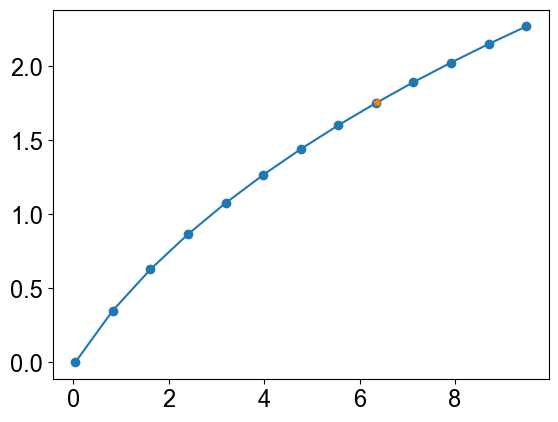

In [35]:
x_0 = 6.366576288
plt.plot(
    SEI_Exp2_GoodFit[str(T_deg)][0]["Throughput capacity [kA.h]"],
    SEI_Exp2_GoodFit[str(T_deg)][0]['CDend LLI SEI [%]'], "-o" )
y_int = np.interp(
    x_0, 
    SEI_Exp2_GoodFit[str(T_deg)][0]["Throughput capacity [kA.h]"], 
    SEI_Exp2_GoodFit[str(T_deg)][0]['CDend LLI SEI [%]'])
plt.plot(x_0, y_int, "*")

In [ ]:
SEIDry_Exp2_GoodFit[str(T_deg)].keys()

dict_keys(['x [m]', 'x_n [m]', 'x_s [m]', 'x_p [m]', 'CCend Porosity', 'CCend Negative electrode interfacial current density [A.m-2]', 'CCend Electrolyte potential [V]', 'CCend Electrolyte concentration [mol.m-3]', 'CCend Negative electrode reaction overpotential [V]', 'CCend Negative particle surface concentration [mol.m-3]', 'CDend Porosity', 'CDend Negative electrode interfacial current density [A.m-2]', 'CDend Electrolyte potential [V]', 'CDend Electrolyte concentration [mol.m-3]', 'CDend Negative electrode reaction overpotential [V]', 'CDend Negative particle surface concentration [mol.m-3]', 'CD Time [h]', 'CD Terminal voltage [V]', 'CD Anode potential [V]', 'CD Cathode potential [V]', 'CC Time [h]', 'CC Terminal voltage [V]', 'CC Anode potential [V]', 'CC Cathode potential [V]', 'Discharge capacity [A.h]', 'Throughput capacity [A.h]', 'CDend Total lithium capacity in particles [A.h]', 'CDend Loss of capacity to lithium plating [A.h]', 'CDend Loss of capacity to SEI [A.h]', 'CDen

C:\Users\lrhkm\AppData\Local\Temp\ipykernel_17324\2522073979.py:336: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


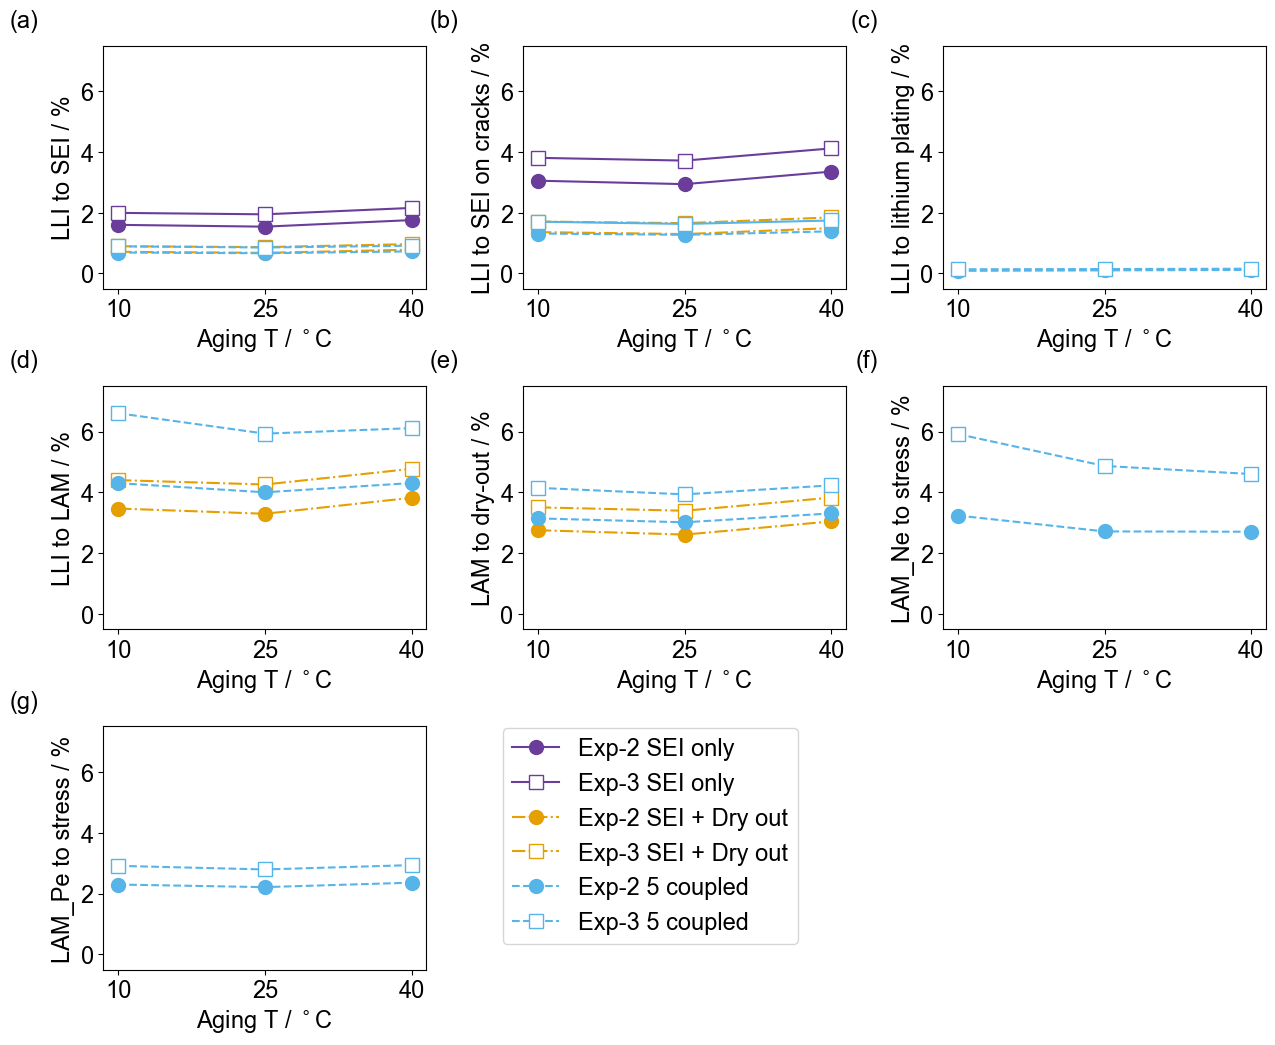

In [36]:
# Supplementary Figure 5
x_0 = 6.366576288
x_key = "Throughput capacity [kA.h]"
## for SEI only: only have SEI 
# LLI due to SEI
j_RPT = 12; 
LLI_to_SEI_Exp2_SEI_only = []; LLI_to_SEI_Exp3_SEI_only = []
LLI_to_SEI_Exp2_SEI_dry = [];  LLI_to_SEI_Exp3_SEI_dry = []
LLI_to_SEI_Exp2_5couple = [];  LLI_to_SEI_Exp3_5couple = []

for i,T_deg in enumerate([10,25,40]):
    str_target = 'CDend LLI SEI [%]'
    LLI_to_SEI_Exp2_SEI_only.append(
        np.interp(
        x_0, 
        SEI_Exp2_GoodFit[str(T_deg)][0][x_key],
        SEI_Exp2_GoodFit[str(T_deg)][0][str_target] )
        )
    LLI_to_SEI_Exp3_SEI_only.append(
        np.interp(
        x_0, 
        SEI_Exp3_GoodFit[str(T_deg)][0][x_key],
        SEI_Exp3_GoodFit[str(T_deg)][0][str_target] )
        )
    
    LLI_to_SEI_Exp2_SEI_dry.append(
        np.interp(
        x_0, 
        SEIDry_Exp2_GoodFit[str(T_deg)][0][x_key],
        SEIDry_Exp2_GoodFit[str(T_deg)][0][str_target] )
        )
    LLI_to_SEI_Exp3_SEI_dry.append(
        np.interp(
        x_0, 
        SEIDry_Exp3_GoodFit[str(T_deg)][0][x_key],
        SEIDry_Exp3_GoodFit[str(T_deg)][0][str_target] )
        )
    
    LLI_to_SEI_Exp2_5couple.append(
        np.interp(
        x_0, 
        Full_Exp2_GoodFit[str(T_deg)][0][x_key],
        Full_Exp2_GoodFit[str(T_deg)][0][str_target] )
        )
    LLI_to_SEI_Exp3_5couple.append(
        np.interp(
        x_0, 
        Full_Exp3_GoodFit[str(T_deg)][0][x_key],
        Full_Exp3_GoodFit[str(T_deg)][0][str_target] )
        )

LLI_to_SEI_cr_Exp2_SEI_only = []; LLI_to_SEI_cr_Exp3_SEI_only = []
LLI_to_SEI_cr_Exp2_SEI_dry = [];  LLI_to_SEI_cr_Exp3_SEI_dry = []
LLI_to_SEI_cr_Exp2_5couple = [];  LLI_to_SEI_cr_Exp3_5couple = []

for i,T_deg in enumerate([10,25,40]):
    str_target = 'CDend LLI SEI on cracks [%]'
    LLI_to_SEI_cr_Exp2_SEI_only.append(
        np.interp(
        x_0, 
        SEI_Exp2_GoodFit[str(T_deg)][0][x_key],
        SEI_Exp2_GoodFit[str(T_deg)][0][str_target] ))
    LLI_to_SEI_cr_Exp3_SEI_only.append(
        np.interp(
        x_0, 
        SEI_Exp3_GoodFit[str(T_deg)][0][x_key],
        SEI_Exp3_GoodFit[str(T_deg)][0][str_target] ))
    
    LLI_to_SEI_cr_Exp2_SEI_dry.append(
        np.interp(
        x_0, 
        SEIDry_Exp2_GoodFit[str(T_deg)][0][x_key],
        SEIDry_Exp2_GoodFit[str(T_deg)][0][str_target] )) 
    LLI_to_SEI_cr_Exp3_SEI_dry.append(
        np.interp(
        x_0, 
        SEIDry_Exp3_GoodFit[str(T_deg)][0][x_key],
        SEIDry_Exp3_GoodFit[str(T_deg)][0][str_target] ))
    
    LLI_to_SEI_cr_Exp2_5couple.append(
        np.interp(
        x_0, 
        Full_Exp2_GoodFit[str(T_deg)][0][x_key],
        Full_Exp2_GoodFit[str(T_deg)][0][str_target] ))
    LLI_to_SEI_cr_Exp3_5couple.append(
        np.interp(
        x_0, 
        Full_Exp3_GoodFit[str(T_deg)][0][x_key],
        Full_Exp3_GoodFit[str(T_deg)][0][str_target] ))
    
LLI_to_LiP_Exp2_5couple = [];  LLI_to_LiP_Exp3_5couple = []
for i,T_deg in enumerate([10,25,40]):
    str_target = 'CDend LLI lithium plating [%]'
    LLI_to_LiP_Exp2_5couple.append(
        Full_Exp2_GoodFit[str(T_deg)][0][str_target][j_RPT])
    LLI_to_LiP_Exp3_5couple.append(
        Full_Exp3_GoodFit[str(T_deg)][0][str_target][j_RPT])

LLI_to_LAM_Exp2_SEI_dry = [];  LLI_to_LAM_Exp3_SEI_dry = []
LLI_to_LAM_Exp2_5couple = [];  LLI_to_LAM_Exp3_5couple = []

for i,T_deg in enumerate([10,25,40]): 
    LLI_to_LAM_Exp2_SEI_dry.append(
        np.interp(
        x_0, 
        SEIDry_Exp2_GoodFit[str(T_deg)][0][x_key],
        SEIDry_Exp2_GoodFit[str(T_deg)][0]['CDend LLI [%]'] )
        - 
        np.interp(
        x_0, 
        SEIDry_Exp2_GoodFit[str(T_deg)][0][x_key],
        SEIDry_Exp2_GoodFit[str(T_deg)][0]['CDend LLI SEI [%]'] )
        - 
        np.interp(
        x_0, 
        SEIDry_Exp2_GoodFit[str(T_deg)][0][x_key],
        SEIDry_Exp2_GoodFit[str(T_deg)][0]['CDend LLI SEI on cracks [%]'] )
        )
    LLI_to_LAM_Exp3_SEI_dry.append(
        np.interp(
        x_0, 
        SEIDry_Exp3_GoodFit[str(T_deg)][0][x_key],
        SEIDry_Exp3_GoodFit[str(T_deg)][0]['CDend LLI [%]'] )
        - 
        np.interp(
        x_0, 
        SEIDry_Exp3_GoodFit[str(T_deg)][0][x_key],
        SEIDry_Exp3_GoodFit[str(T_deg)][0]['CDend LLI SEI [%]'] )
        - 
        np.interp(
        x_0, 
        SEIDry_Exp3_GoodFit[str(T_deg)][0][x_key],
        SEIDry_Exp3_GoodFit[str(T_deg)][0]['CDend LLI SEI on cracks [%]'])  )
    
    LLI_to_LAM_Exp2_5couple.append(
        np.interp(
        x_0, 
        Full_Exp2_GoodFit[str(T_deg)][0][x_key],
        Full_Exp2_GoodFit[str(T_deg)][0]['CDend LLI [%]'])
        - 
        np.interp(
        x_0, 
        Full_Exp2_GoodFit[str(T_deg)][0][x_key],
        Full_Exp2_GoodFit[str(T_deg)][0]['CDend LLI SEI [%]'])
        - 
        np.interp(
        x_0, 
        Full_Exp2_GoodFit[str(T_deg)][0][x_key],
        Full_Exp2_GoodFit[str(T_deg)][0]['CDend LLI SEI on cracks [%]'])
        - 
        np.interp(
        x_0, 
        Full_Exp2_GoodFit[str(T_deg)][0][x_key],
        Full_Exp2_GoodFit[str(T_deg)][0]['CDend LLI lithium plating [%]'])
        )
    LLI_to_LAM_Exp3_5couple.append(
        np.interp(
        x_0, 
        Full_Exp3_GoodFit[str(T_deg)][0][x_key],
        Full_Exp3_GoodFit[str(T_deg)][0]['CDend LLI [%]'])
        - 
        np.interp(
        x_0, 
        Full_Exp3_GoodFit[str(T_deg)][0][x_key],
        Full_Exp3_GoodFit[str(T_deg)][0]['CDend LLI SEI [%]'])
        - 
        np.interp(
        x_0, 
        Full_Exp3_GoodFit[str(T_deg)][0][x_key],
        Full_Exp3_GoodFit[str(T_deg)][0]['CDend LLI SEI on cracks [%]'])
        - 
        np.interp(
        x_0, 
        Full_Exp3_GoodFit[str(T_deg)][0][x_key],
        Full_Exp3_GoodFit[str(T_deg)][0]['CDend LLI lithium plating [%]'])
        )

LAM_to_Dry_Exp2_SEI_dry = [];  LAM_to_Dry_Exp3_SEI_dry = []
LAM_to_Dry_Exp2_5couple = [];  LAM_to_Dry_Exp3_5couple = []
LAM_to_Crack_Ne_Exp2_5couple = [];   LAM_to_Crack_Pe_Exp2_5couple = [];
LAM_to_Crack_Ne_Exp3_5couple = [];   LAM_to_Crack_Pe_Exp3_5couple = [];
for i,T_deg in enumerate([10,25,40]):
    LAM_to_Dry_Exp2_SEI_dry.append(
        100 - SEIDry_Exp2_GoodFit[str(T_deg)][2]['Width_all'][j_RPT]
        / SEIDry_Exp2_GoodFit[str(T_deg)][2]['Width_all'][0]*100 )
    LAM_to_Dry_Exp3_SEI_dry.append(
        100 - SEIDry_Exp3_GoodFit[str(T_deg)][2]['Width_all'][j_RPT]
        / SEIDry_Exp3_GoodFit[str(T_deg)][2]['Width_all'][0]*100)
    
    LAM_to_Dry_Exp2_5couple.append(
        100 - Full_Exp2_GoodFit[str(T_deg)][2]['Width_all'][j_RPT]
        / Full_Exp2_GoodFit[str(T_deg)][2]['Width_all'][0]*100 )
    LAM_to_Dry_Exp3_5couple.append(
        100 - Full_Exp3_GoodFit[str(T_deg)][2]['Width_all'][j_RPT]
        / Full_Exp3_GoodFit[str(T_deg)][2]['Width_all'][0]*100)
    
    LAM_to_Crack_Ne_Exp2_5couple.append(
        Full_Exp2_GoodFit[str(T_deg)][0]['CDend LAM_ne [%]'][j_RPT] - 
        ( 100 - Full_Exp2_GoodFit[str(T_deg)][2]['Width_all'][j_RPT]
        / Full_Exp2_GoodFit[str(T_deg)][2]['Width_all'][0]*100 )    )
    LAM_to_Crack_Pe_Exp2_5couple.append(
        Full_Exp2_GoodFit[str(T_deg)][0]['CDend LAM_pe [%]'][j_RPT] - 
        ( 100 - Full_Exp2_GoodFit[str(T_deg)][2]['Width_all'][j_RPT]
        / Full_Exp2_GoodFit[str(T_deg)][2]['Width_all'][0]*100 )    )
    LAM_to_Crack_Ne_Exp3_5couple.append(
        Full_Exp3_GoodFit[str(T_deg)][0]['CDend LAM_ne [%]'][j_RPT] - 
        ( 100 - Full_Exp3_GoodFit[str(T_deg)][2]['Width_all'][j_RPT]
        / Full_Exp3_GoodFit[str(T_deg)][2]['Width_all'][0]*100 )    )
    LAM_to_Crack_Pe_Exp3_5couple.append(
        Full_Exp3_GoodFit[str(T_deg)][0]['CDend LAM_pe [%]'][j_RPT] - 
        ( 100 - Full_Exp3_GoodFit[str(T_deg)][2]['Width_all'][j_RPT]
        / Full_Exp3_GoodFit[str(T_deg)][2]['Width_all'][0]*100 )    )


ms = 10
fig, Axs = plt.subplots(3,3, figsize=(15,12),tight_layout=True) 
axs = Axs.flatten()
# LLI to SEI - ALL 3 models has that
axs[0].plot(
    T_deg_All, LLI_to_SEI_Exp2_SEI_only,color = cm_4s[0],
    marker = 'o',markersize = ms, 
    label=f'Exp-2 {Str_cases[0]}')
axs[0].plot(
    T_deg_All, LLI_to_SEI_Exp3_SEI_only,color = cm_4s[0],
    marker = 's',markersize = ms,markerfacecolor='w', 
    label=f'Exp-3 {Str_cases[0]}')
axs[0].plot(
    T_deg_All, LLI_to_SEI_Exp2_SEI_dry,color = cm_4s[1],
    marker = 'o',markersize = ms, linestyle='-.',
    label=f'Exp-2 {Str_cases[1]}')
axs[0].plot(
    T_deg_All, LLI_to_SEI_Exp3_SEI_dry,color = cm_4s[1],
    marker = 's',markersize = ms,markerfacecolor='w',linestyle='-.',
    label=f'Exp-3 {Str_cases[1]}')
axs[0].plot(
    T_deg_All, LLI_to_SEI_Exp2_5couple,color = cm_4s[2],
    marker = 'o',markersize = ms,linestyle='--',
    label=f'Exp-2 {Str_cases[2]}')
axs[0].plot(
    T_deg_All, LLI_to_SEI_Exp3_5couple,color = cm_4s[2],
    marker = 's',markersize = ms,markerfacecolor='w',linestyle='--',
    label=f'Exp-3 {Str_cases[2]}')
axs[0].set_ylabel("LLI to SEI / %")
# LLI to SEI on cracks - ALL 3 models has that
axs[1].plot(
    T_deg_All, LLI_to_SEI_cr_Exp2_SEI_only,color = cm_4s[0],
    marker = 'o',markersize = ms)
axs[1].plot(
    T_deg_All, LLI_to_SEI_cr_Exp3_SEI_only,color = cm_4s[0],
    marker = 's',markersize = ms,markerfacecolor='w',)
axs[1].plot(
    T_deg_All, LLI_to_SEI_cr_Exp2_SEI_dry,color = cm_4s[1],
    marker = 'o',markersize = ms,linestyle='-.',)
axs[1].plot(
    T_deg_All, LLI_to_SEI_cr_Exp3_SEI_dry,color = cm_4s[1],
    marker = 's',markersize = ms,markerfacecolor='w',linestyle='-.',)
axs[1].plot(
    T_deg_All, LLI_to_SEI_cr_Exp2_5couple,color = cm_4s[2],
    marker = 'o',markersize = ms,linestyle='--',)
axs[1].plot(
    T_deg_All, LLI_to_SEI_cr_Exp3_5couple,color = cm_4s[2],
    marker = 's',markersize = ms,markerfacecolor='w',)
axs[1].set_ylabel("LLI to SEI on cracks / %")
# LLI to Li plating - only 5 coupled have that
axs[2].plot(
    T_deg_All, LLI_to_LiP_Exp2_5couple,color = cm_4s[2],
    marker = 'o',markersize = ms,linestyle='--',)
axs[2].plot(
    T_deg_All, LLI_to_LiP_Exp3_5couple,color = cm_4s[2],
    marker = 's',markersize = ms,markerfacecolor='w',linestyle='--',)
axs[2].set_ylabel("LLI to lithium plating / %")
# LLI due to LAM - only SEI+Dry out and Full have that
axs[3].plot(
    T_deg_All, LLI_to_LAM_Exp2_SEI_dry,color = cm_4s[1],
    marker = 'o',markersize = ms,linestyle='-.',)
axs[3].plot(
    T_deg_All, LLI_to_LAM_Exp3_SEI_dry,color = cm_4s[1],
    marker = 's',markersize = ms,markerfacecolor='w',linestyle='-.',)
axs[3].plot(
    T_deg_All, LLI_to_LAM_Exp2_5couple,color = cm_4s[2],
    marker = 'o',markersize = ms,linestyle='--',)
axs[3].plot(
    T_deg_All, LLI_to_LAM_Exp3_5couple,color = cm_4s[2],
    marker = 's',markersize = ms,markerfacecolor='w',linestyle='--',)
axs[3].set_ylabel("LLI to LAM / %")
# LAM to Dry-out - only SEI+Dry out and Full have that
axs[4].plot(
    T_deg_All, LAM_to_Dry_Exp2_SEI_dry,color = cm_4s[1],
    marker = 'o',markersize = ms,linestyle='-.',)
axs[4].plot(
    T_deg_All, LAM_to_Dry_Exp3_SEI_dry,color = cm_4s[1],
    marker = 's',markersize = ms,markerfacecolor='w',linestyle='-.',)
axs[4].plot(
    T_deg_All, LAM_to_Dry_Exp2_5couple,color = cm_4s[2],
    marker = 'o',markersize = ms,linestyle='--',)
axs[4].plot(
    T_deg_All, LAM_to_Dry_Exp3_5couple,color = cm_4s[2],
    marker = 's',markersize = ms,markerfacecolor='w',linestyle='--',)
axs[4].set_ylabel("LAM to dry-out / %")
# Mechanical LAM_Ne - only 5 coupled have that
axs[5].plot(
    T_deg_All, LAM_to_Crack_Ne_Exp2_5couple,color = cm_4s[2],
    marker = 'o',markersize = ms,linestyle='--',)
axs[5].plot(
    T_deg_All, LAM_to_Crack_Ne_Exp3_5couple,color = cm_4s[2],
    marker = 's',markersize = ms,markerfacecolor='w',linestyle='--',)
axs[5].set_ylabel("LAM_Ne to stress / %")
# Mechanical LAM_Pe - only 5 coupled have that
axs[6].plot(
    T_deg_All, LAM_to_Crack_Pe_Exp2_5couple,color = cm_4s[2],
    marker = 'o',markersize = ms,linestyle='--',)
axs[6].plot(
    T_deg_All, LAM_to_Crack_Pe_Exp3_5couple,color = cm_4s[2],
    marker = 's',markersize = ms,markerfacecolor='w',linestyle='--',)
axs[6].set_ylabel("LAM_Pe to stress / %")
# Hide the last two subplots
for i in range(7, 9):
    fig.delaxes(axs[i])

for i in range(7):
    axs[i].set_xlabel(r"Aging T / $^\circ$C")
for i in range(7):   
    axs[i].set_ylim(-0.5,7.5)
labels = [
    "(a)", "(b)", "(c)", 
    "(d)", "(e)", "(f)", 
    "(g)"]
for i in range(7):   
    axs[i].text(
        -0.20, 1.15, 
        labels[i], transform=axs[i].transAxes, 
        fontsize=fs,  # fontweight='bold', 
        va='top', ha='right')
# Position the legend in the empty space
axs[0].legend(loc='center left', bbox_to_anchor=(1.2, -2.25), fontsize=fs)
plt.tight_layout()
# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.savefig(
    target_folder + 
    f"/Supplementary Figure 5 Decompose_DM_different_mechanisms_Model_Exp_2_and_3.svg")
plt.savefig(
    target_folder + 
    f"/Supplementary Figure 5 Decompose_DM_different_mechanisms_Model_Exp_2_and_3.png", dpi=dpi)


'd:\\lrhwork\\model_rh\\env_pbgem_nc\\SimSave\\Li2024_Results\\SaveFig\\R_241208_Compare_Exp_2_3\\Supplementary Figure 5.xlsx'

In [42]:
# Supplementary Figure 5
excel_file_path = os.path.join(target_folder, "Supplementary Figure 5.xlsx")
data_for_excel = {}
# 保存fig(a)数据
df_fig_a = pd.DataFrame({
    'T_deg_All': T_deg_All,
    'LLI_to_SEI_Exp2_SEI_only': LLI_to_SEI_Exp2_SEI_only,
    'LLI_to_SEI_Exp3_SEI_only': LLI_to_SEI_Exp3_SEI_only,
    'LLI_to_SEI_Exp2_SEI_dry': LLI_to_SEI_Exp2_SEI_dry,
    'LLI_to_SEI_Exp3_SEI_dry': LLI_to_SEI_Exp3_SEI_dry,
    'LLI_to_SEI_Exp2_5couple': LLI_to_SEI_Exp2_5couple,
    'LLI_to_SEI_Exp3_5couple': LLI_to_SEI_Exp3_5couple
})
data_for_excel['fig(a)'] = df_fig_a

# 保存fig(b)数据
df_fig_b = pd.DataFrame({
    'T_deg_All': T_deg_All,
    'LLI_to_SEI_cr_Exp2_SEI_only': LLI_to_SEI_cr_Exp2_SEI_only,
    'LLI_to_SEI_cr_Exp3_SEI_only': LLI_to_SEI_cr_Exp3_SEI_only,
    'LLI_to_SEI_cr_Exp2_SEI_dry': LLI_to_SEI_cr_Exp2_SEI_dry,
    'LLI_to_SEI_cr_Exp3_SEI_dry': LLI_to_SEI_cr_Exp3_SEI_dry,
    'LLI_to_SEI_cr_Exp2_5couple': LLI_to_SEI_cr_Exp2_5couple,
    'LLI_to_SEI_cr_Exp3_5couple': LLI_to_SEI_cr_Exp3_5couple
})
data_for_excel['fig(b)'] = df_fig_b

# 保存fig(c)数据
df_fig_c = pd.DataFrame({
    'T_deg_All': T_deg_All,
    'LLI_to_LiP_Exp2_5couple': LLI_to_LiP_Exp2_5couple,
    'LLI_to_LiP_Exp3_5couple': LLI_to_LiP_Exp3_5couple
})
data_for_excel['fig(c)'] = df_fig_c


# 保存fig(d)数据
df_fig_d = pd.DataFrame({
    'T_deg_All': T_deg_All,
    'LLI_to_LAM_Exp2_SEI_dry': LLI_to_LAM_Exp2_SEI_dry,
    'LLI_to_LAM_Exp3_SEI_dry': LLI_to_LAM_Exp3_SEI_dry,
    'LLI_to_LAM_Exp2_5couple': LLI_to_LAM_Exp2_5couple,
    'LLI_to_LAM_Exp3_5couple': LLI_to_LAM_Exp3_5couple
})
data_for_excel['fig(d)'] = df_fig_d

# 保存fig(e)数据
df_fig_e = pd.DataFrame({
    'T_deg_All': T_deg_All,
    'LAM_to_Dry_Exp2_SEI_dry': LAM_to_Dry_Exp2_SEI_dry,
    'LAM_to_Dry_Exp3_SEI_dry': LAM_to_Dry_Exp3_SEI_dry,
    'LAM_to_Dry_Exp2_5couple': LAM_to_Dry_Exp2_5couple,
    'LAM_to_Dry_Exp3_5couple': LAM_to_Dry_Exp3_5couple
})
data_for_excel['fig(e)'] = df_fig_e

# 保存fig(f)数据
df_fig_f = pd.DataFrame({
    'T_deg_All': T_deg_All,
    'LAM_to_Crack_Ne_Exp2_5couple': LAM_to_Crack_Ne_Exp2_5couple,
    'LAM_to_Crack_Ne_Exp3_5couple': LAM_to_Crack_Ne_Exp3_5couple
})
data_for_excel['fig(f)'] = df_fig_f

# 保存fig(g)数据
df_fig_g = pd.DataFrame({
    'T_deg_All': T_deg_All,
    'LAM_to_Crack_Pe_Exp2_5couple': LAM_to_Crack_Pe_Exp2_5couple,
    'LAM_to_Crack_Pe_Exp3_5couple': LAM_to_Crack_Pe_Exp3_5couple
})
data_for_excel['fig(g)'] = df_fig_g

with pd.ExcelWriter(excel_file_path) as writer:
    # Save each subplot's data to a separate sheet
    for sheet_name, data in data_for_excel.items():
        df = pd.DataFrame(data)
        df.to_excel(writer, sheet_name=sheet_name, index=False)

# 保存Excel文件
# writer.save()
print(f"Supplementary Figure 5 saved to {excel_file_path}")

Supplementary Figure 5 saved to d:\lrhwork\model_rh\env_pbgem_nc\SimSave\Li2024_Results\SaveFig\R_241208_Compare_Exp_2_3\Supplementary Figure 5.xlsx
